## NDVI Calculation Using Rasterio

In [ ]:
import rasterio
import numpy

b4 = "/home/vivek/Documents/mydata/iimb/satellite_images/LC08_L1TP_201024_20140704_20170421_01_T1/LC08_L1TP_201024_20140704_20170421_01_T1_B4.TIF"
b5 = "/home/vivek/Documents/mydata/iimb/satellite_images/LC08_L1TP_201024_20140704_20170421_01_T1/LC08_L1TP_201024_20140704_20170421_01_T1_B5.TIF"
# We handle the connections with "with"
with rasterio.open(b4) as src:
    b4 = src.read(1)
    
with rasterio.open(b5) as src:
    b5 = src.read(1)
    
# Allow division by zero
numpy.seterr(divide='ignore', invalid='ignore')

ndvi = numpy.zeros(b4.shape,dtype=rasterio.float32)
# Calculate NDVI
ndvi = (b5.astype(float) - b4.astype(float)) / (b5 + b4)

## Plotting NDVI Results

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Take a spatial subset of the ndvi layer produced
ndvi_sub = ndvi[2000:3000, 2000:3000]

# Plot
plt.imshow(b5)
plt.show()

## Writing Out Of Tiff File

In [ ]:
# Define spatial characteristics of output object (basically they are analog to the input)
kwargs = src.meta

# Update kwargs (change in data type)
kwargs.update(
    dtype=rasterio.float32,
    count = 1,
compress='lzw')

# Let's see what is in there
print (kwargs)

with rasterio.open('/home/vivek/Documents/mydata/iimb/satellite_images/ndvi.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))

## NDVI Using GDAL For Whole London

In [1]:
import numpy as np
from sys import argv
from osgeo import gdal, gdalconst


b4 = "/home/vivek/Documents/mydata/iimb/satellite_images/LC08_L1TP_201024_20140704_20170421_01_T1/LC08_L1TP_201024_20140704_20170421_01_T1_B4.TIF"
b5 = "/home/vivek/Documents/mydata/iimb/satellite_images/LC08_L1TP_201024_20140704_20170421_01_T1/LC08_L1TP_201024_20140704_20170421_01_T1_B5.TIF"

# Type for internal calculations:
t = np.float32

red = gdal.Open(b4)
nir = gdal.Open(b5)

geotiff = gdal.GetDriverByName('GTiff')

# Ugly syntax, but fast:
r = red.GetRasterBand(1).ReadAsArray(0, 0, red.RasterXSize, red.RasterYSize)
n = nir.GetRasterBand(1).ReadAsArray(0, 0, nir.RasterXSize, nir.RasterYSize)

# Convert the 16-bit Landsat 8 values to floats for the division operation:
r = r.astype(t)
n = n.astype(t)

# Tell numpy not to complain about division by 0:
np.seterr(invalid='ignore')

# Here's the meat of this whole thing, the actual NDVI formula:
ndvi = (n - r)/(n + r)

# The ndvi value is in the range -1..1, but we want it to be displayable, so:
# Make the value positive and scale it back up to the 16-bit range:
ndvi = (ndvi + 1) * (2**15 - 1)

# And do the type conversion back:
ndvi = ndvi.astype(np.uint16)

# output.GetRasterBand(0).WriteArray(ndvi)

## Plotting NDVI

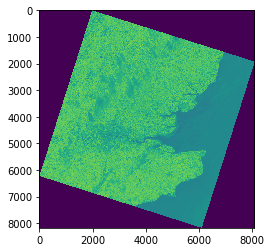

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(ndvi)
plt.show()